In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!module list

Currently Loaded Modulefiles:
 1) shared                             7) cuda11.2/nsight/11.2.2      
 2) slurm/slurm/20.11.8                8) cuda11.2/fft/11.2.2         
 3) python37                           9) cuda11.2/blas/11.2.2        
 4) jupyter-eg-kernel-wlm-py37/2.0.0  10) cudnn8.1-cuda11.2/8.1.1.33  
 5) cuda11.2/toolkit/11.2.2           11) cuda11.2/11.2.2             
 6) cuda11.2/profiler/11.2.2          
>

In [3]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [6]:
# Blood Pressure data
x = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9, 
     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114, 
     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
     176,  99, 130, 172, 121, 133, 178, 147, 144, 217] 
data_x = np.asarray(data_x, np.float32) 
data_y = np.asarray(y, np.float32)

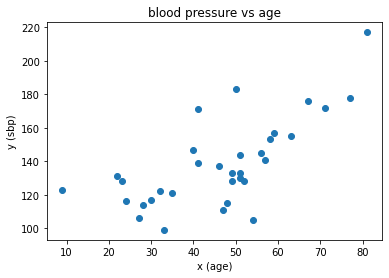

In [7]:
plt.scatter(x=x,y=y)
plt.title("blood pressure vs age")
plt.xlabel("x (age)")
plt.ylabel("y (sbp)")
plt.show()

In [11]:
#slope
a_  = tf.Variable(3.0, name='slope')                       # 
#intercept
b_  = tf.Variable(80.0, name='intercept') 

#define model
@tf.function
def model(x):
    return a_*x+b_

#define mse
@tf.function
def mse(y_true, y_pred):
    return tf.losses.mean_squared_error(y_true,y_pred)

#SGD Optimizer
#optimizer = tf.optimizers.SGD(learning_rate=0.0001)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)


In [12]:
print(a_.numpy(),b_.numpy())

3.0 80.0


In [13]:
#start training
epochs = 100000
display_step = 1000
history = []
for epoch in range(epochs):
    
    #monitor training / display steps
    if((epoch%display_step)==0):
        pred = model(data_x)
        loss = mse(pred, data_y)
        history.append(np.array(a_*data_x + b_))
        print(f"Epoch {epoch} | Loss {loss.numpy()}, a: {a_.numpy()} b:{b_.numpy()}")
        
    #begin GradientTape and optimize
    with tf.GradientTape() as g:
        pred = model(data_x)
        loss = mse(data_y,pred)
        
    #compute dw, db
    gradients = g.gradient(loss, [a_,b_])
    
    #update a_ and b_
    optimizer.apply_gradients(zip(gradients,[a_,b_]))
    

#        print(f"Epoch {epoch:%d} | Loss {loss.numpy():%.2f}, a: {a_.numpy():%.2f} b:{b_.numpy():%.2f}")


Epoch 0 | Loss 7658.818359375, a: 3.0 b:80.0
Epoch 1000 | Loss 2176.300048828125, a: 2.1413421630859375 b:79.14372253417969
Epoch 2000 | Loss 585.1517944335938, a: 1.5877580642700195 b:78.60151672363281
Epoch 3000 | Loss 366.31982421875, a: 1.3402141332626343 b:78.38483428955078
Epoch 4000 | Loss 358.7793884277344, a: 1.2873793840408325 b:78.39397430419922
Epoch 5000 | Loss 358.5458068847656, a: 1.282391905784607 b:78.49380493164062
Epoch 6000 | Loss 358.2102355957031, a: 1.2791459560394287 b:78.66004943847656
Epoch 7000 | Loss 357.69415283203125, a: 1.274072289466858 b:78.92198181152344
Epoch 8000 | Loss 356.9465026855469, a: 1.2664331197738647 b:79.31591033935547
Epoch 9000 | Loss 355.9631652832031, a: 1.2557955980300903 b:79.86426544189453
Epoch 10000 | Loss 354.8238220214844, a: 1.2424547672271729 b:80.55223846435547
Epoch 11000 | Loss 353.6590270996094, a: 1.2273509502410889 b:81.332275390625
Epoch 12000 | Loss 352.57763671875, a: 1.211452603340149 b:82.1544189453125
Epoch 13000 |

KeyboardInterrupt: 

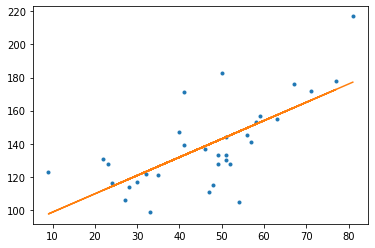

In [14]:
plt.plot(data_x,data_y,'.')
plt.plot(data_x,model(data_x))

In [16]:
print(a_.numpy(),b_.numpy())

1.1050218 87.67142
